In [1]:
import warnings

import numpy as np

from data import data_params, generate_data
from global_param import initialize_global_lds_parameters
from lds import (
    info_observation_params,
    run_iter,
)
from plot import plot_observations, plot_global_parameters

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)

In [2]:
"""
Data setup
"""
T = 900
A, Q, C, R = data_params()
_, N = C.shape

latents, obs = generate_data(A, Q, C, R, T)
obs = obs.unsqueeze(1)

In [3]:
"""
Initialize priors
"""
niw_prior, mniw_prior = initialize_global_lds_parameters(N)
niw_param, mniw_param = initialize_global_lds_parameters(N)
mniw_prior, mniw_param = list(mniw_prior), list(mniw_param)

iteration 0


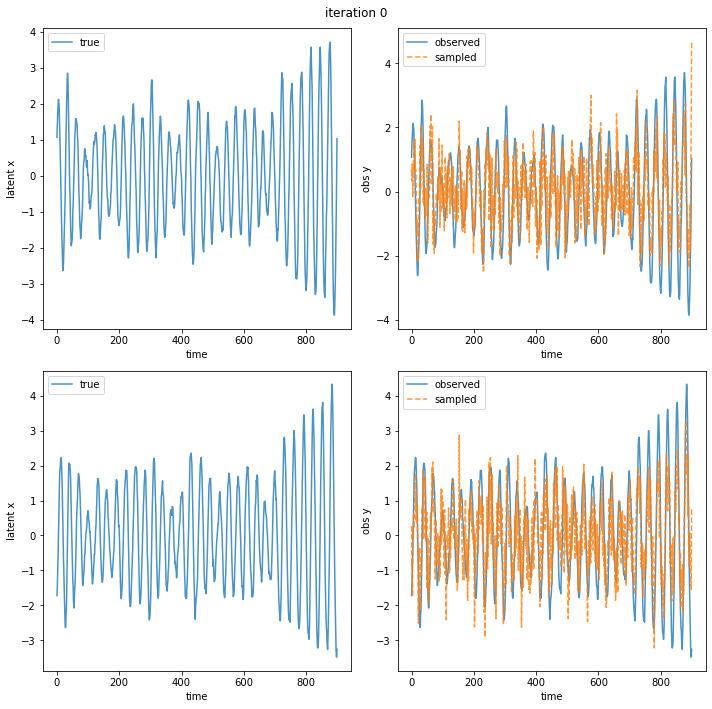

iteration 100


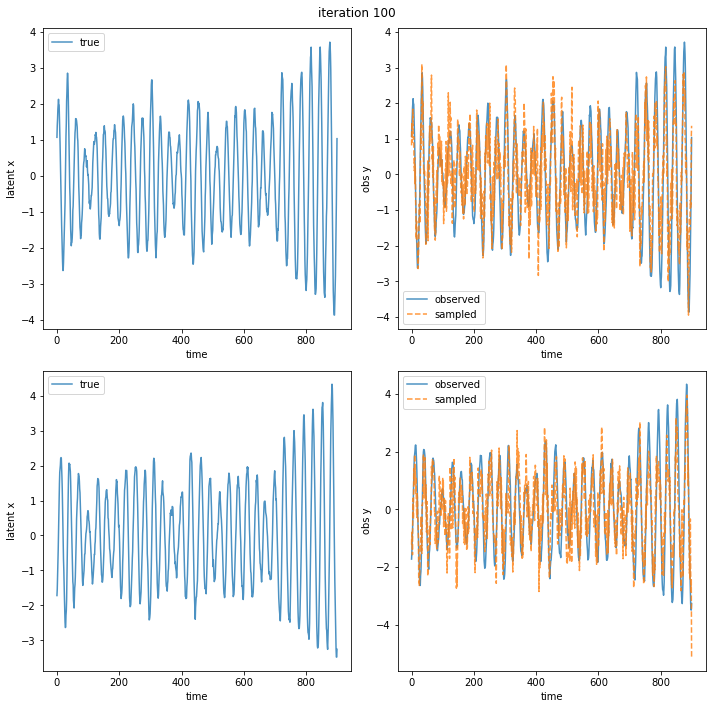

iteration 200


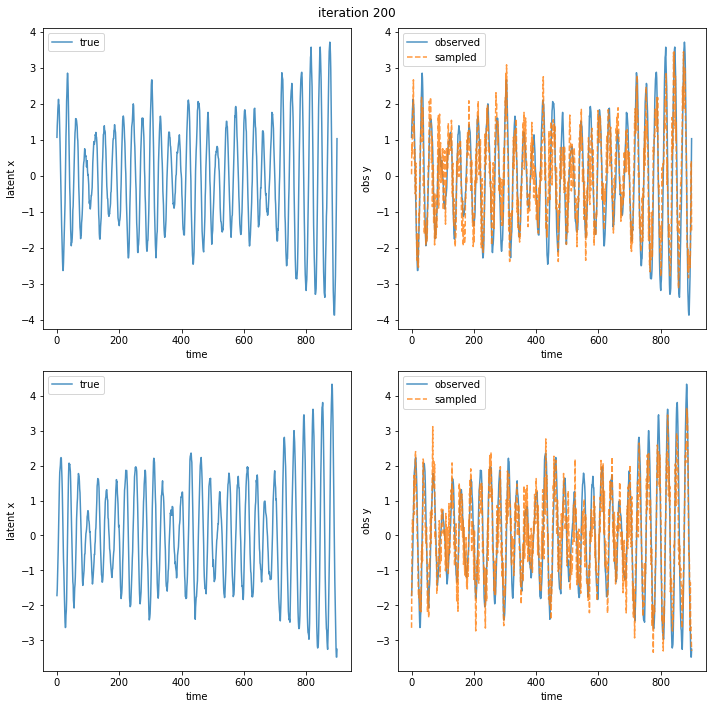

iteration 300


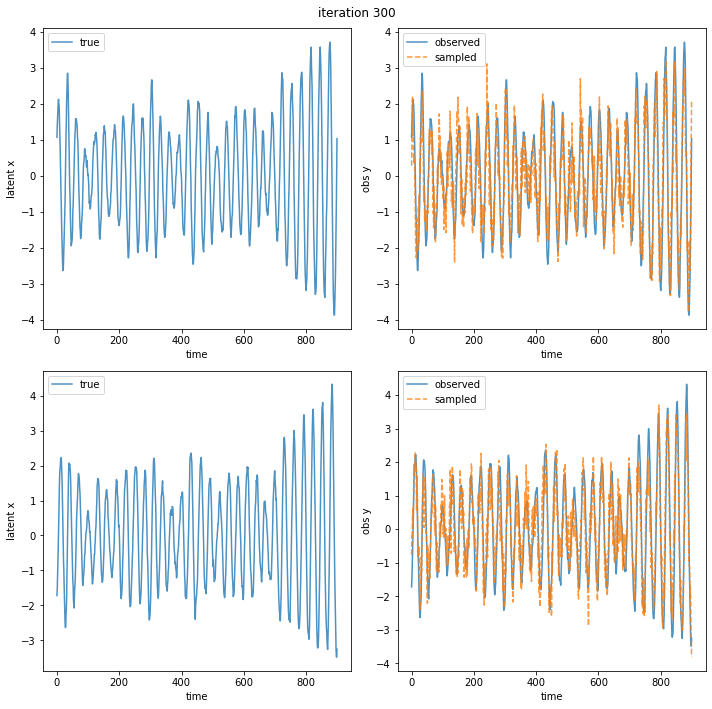

iteration 400


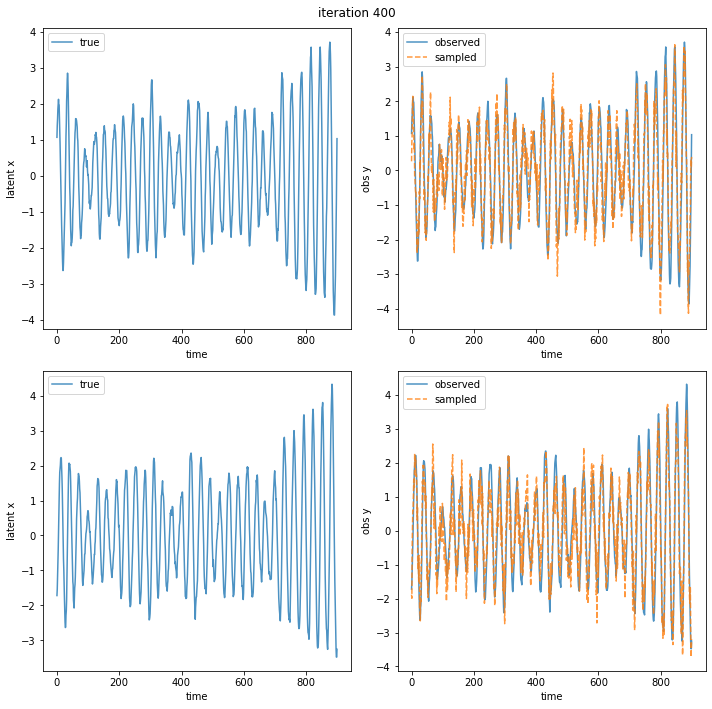

iteration 500


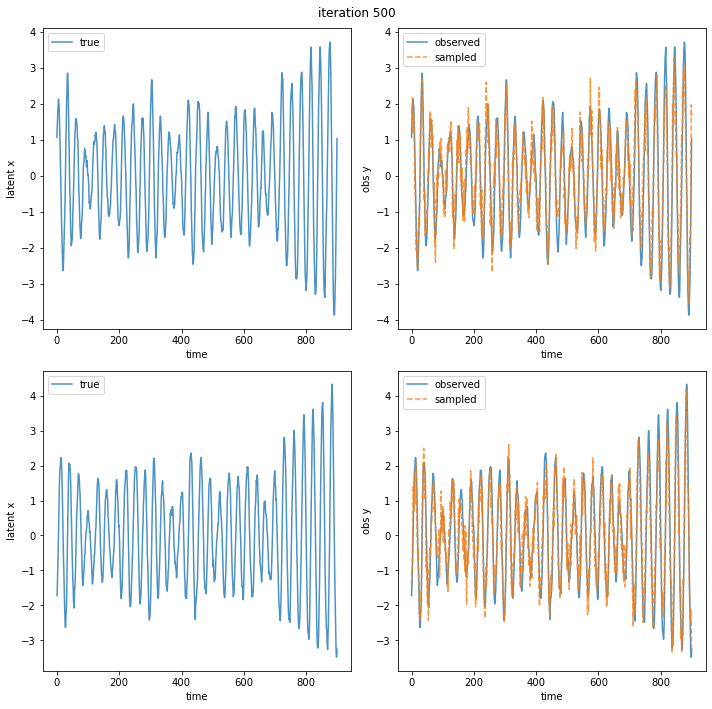

iteration 600


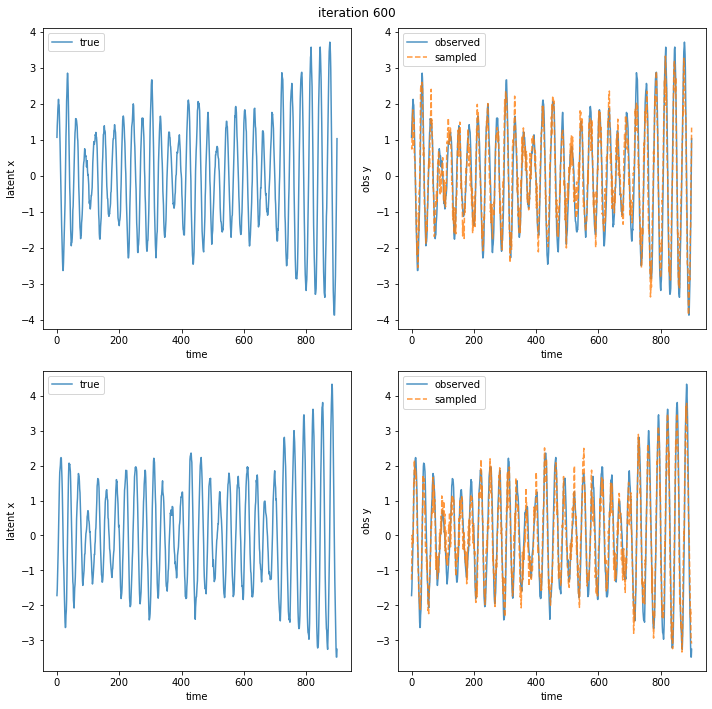

iteration 700


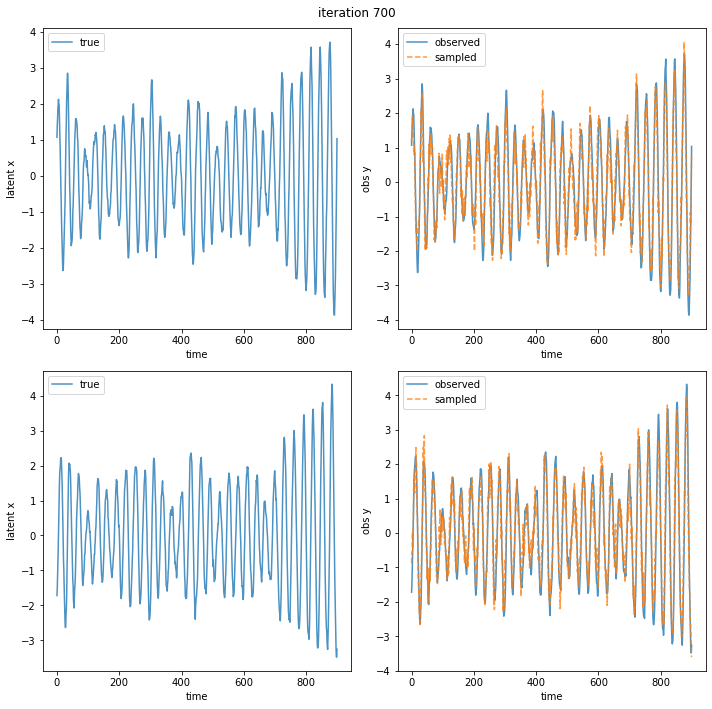

iteration 800


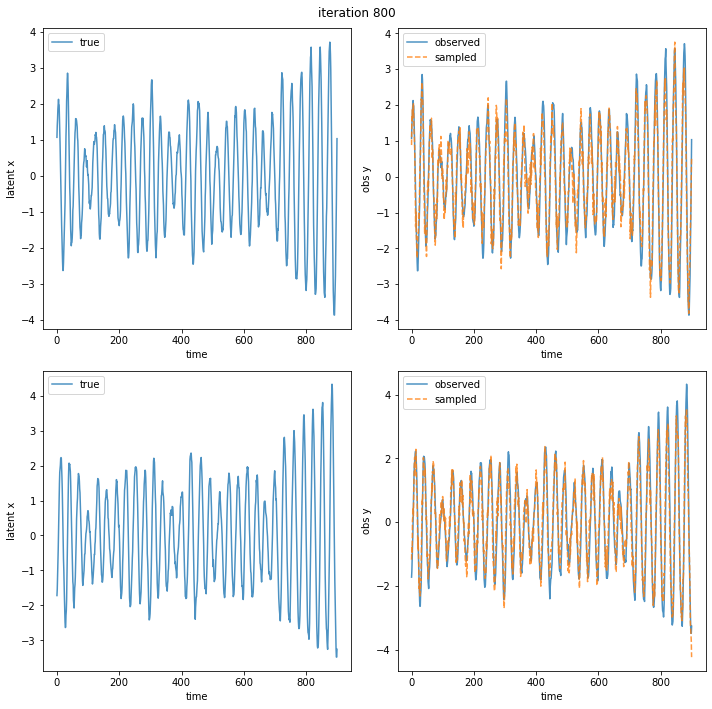

iteration 900


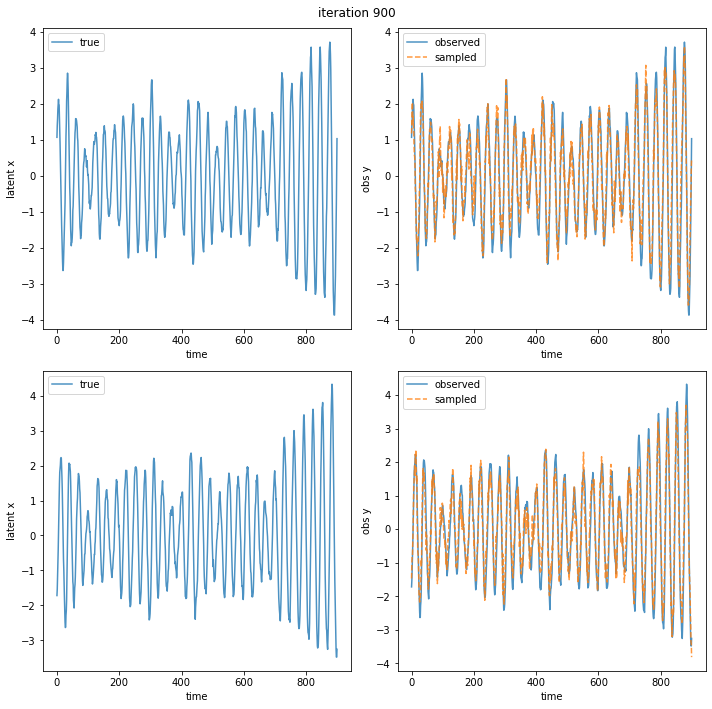

In [4]:
"""
Optimization loop
"""
n_iter = 1000
for i in range(n_iter):
    y = info_observation_params(obs, C, R)
    niw_param, mniw_param, samples = run_iter(
        y, (niw_param, mniw_param), (niw_prior, mniw_prior)
    )

    if i % max((n_iter // 10), 1) == 0 or i == 0:
        print(f"iteration {i}")
        plot_observations(obs, latents, samples, title=f"iteration {i}")

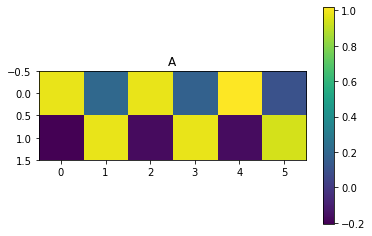

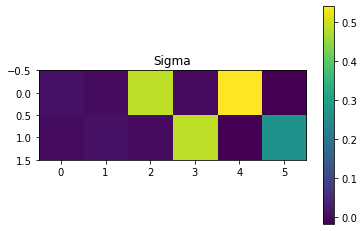

In [5]:
plot_global_parameters(A, Q, mniw_param)

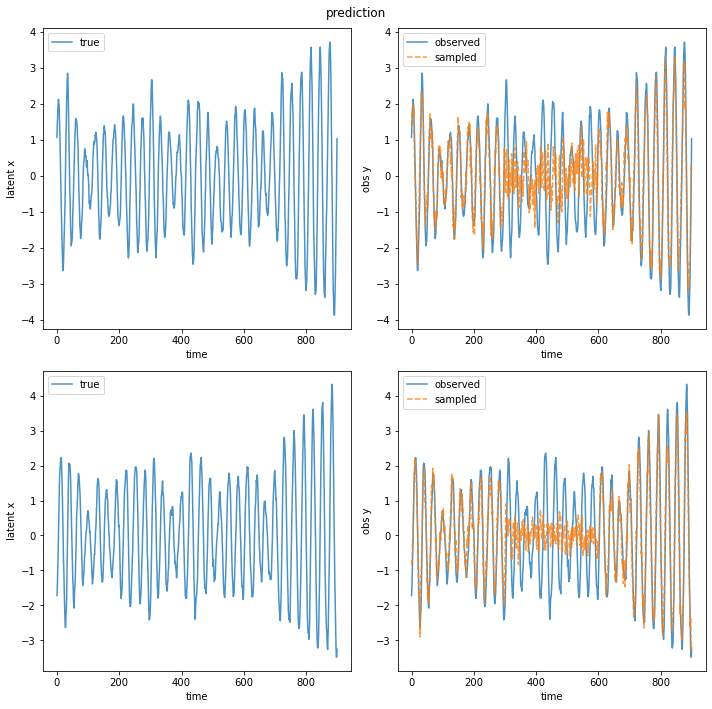

In [6]:
"""
Plot predictions
"""
y = info_observation_params(obs, C, R, zero=(300, 600))
_, _, samples = run_iter(
    y, (niw_param, mniw_param), (niw_prior, mniw_prior)
)
plot_observations(obs, latents, samples @ C.T, title="prediction")